In [320]:
FUENTES_DIR  = '../Fuentes'
DATOS_DIR   = '../Datos/' 

import sys
sys.path.append(FUENTES_DIR)

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing, metrics
from ClassPerceptron import Perceptron

In [321]:
datos = pd.read_csv(DATOS_DIR + "zoo.csv", encoding='latin1')

datos.head()
#len(datos)

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


In [322]:
datos.Clase.unique()
len(datos.animal.unique())

100

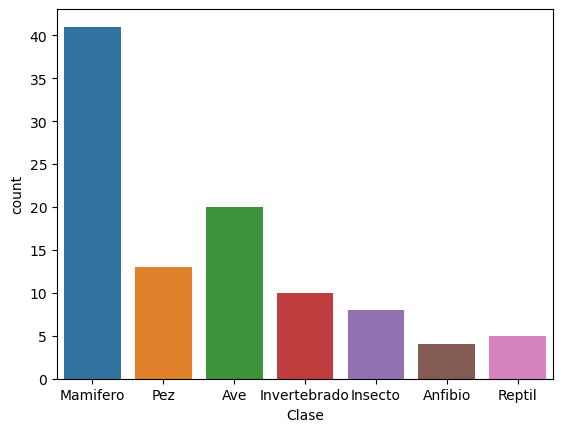

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Clase", data=datos)
plt.show()

## a)
Yo creo que la dificultad está en que solo las aves y mamíferos tienen más de 15 datos, por lo cual es probable que el modelo solo sea bueno prediciendo mamíferos

# b)
### A continuación vamos a entrenar el modelo sin dividir el dataset en train y test, simplemente porque así lo pide la consigna
La mejor precisión que obtuve fue del 100%

In [324]:
mapeo = {
    "Clase":{'Mamifero':1, 'Pez':0, 'Ave':0, 'Invertebrado':0, 'Insecto':0, 'Anfibio':0, 'Reptil':0}
}
datos.replace(mapeo,inplace=True)
datos.head()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [325]:
X = np.array(datos.iloc[:,1:-1])
T = np.array(datos['Clase'])

print(len(X))
print(len(T))

101
101


In [326]:
X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)

normalizador= preprocessing.StandardScaler() #media y desvío
X_train = normalizador.fit_transform(X_train)
X_test  = normalizador.transform(X_test)

print(X_test)

[[ 1.30088727 -0.56635211 -1.34164079  1.30088727 -0.52223297 -0.76870611
  -1.12163475  0.84102145  0.40824829  0.54433105 -0.17149859 -0.5
  -0.28949313  0.52223297 -0.3592106  -0.89155583]
 [ 1.30088727 -0.56635211 -1.34164079  1.30088727 -0.52223297 -0.76870611
  -1.12163475  0.84102145  0.40824829  0.54433105 -0.17149859 -0.5
   0.74971297  0.52223297 -0.3592106   1.12163475]
 [-0.76870611 -0.56635211 -1.34164079  1.30088727 -0.52223297  1.30088727
   0.89155583  0.84102145  0.40824829  0.54433105 -0.17149859  2.
  -1.32869922  0.52223297 -0.3592106   1.12163475]
 [ 1.30088727 -0.56635211 -1.34164079  1.30088727 -0.52223297 -0.76870611
   0.89155583  0.84102145  0.40824829  0.54433105 -0.17149859 -0.5
   0.74971297  0.52223297 -0.3592106   1.12163475]
 [ 1.30088727 -0.56635211 -1.34164079  1.30088727 -0.52223297 -0.76870611
   0.89155583  0.84102145  0.40824829  0.54433105 -0.17149859 -0.5
   0.74971297  0.52223297 -0.3592106   1.12163475]
 [ 1.30088727 -0.56635211  0.74535599 -0.

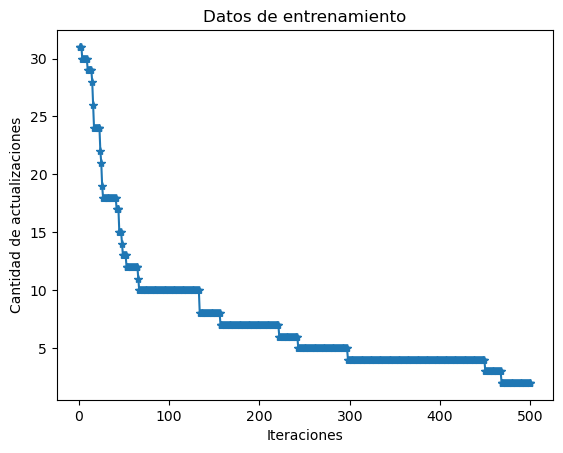

In [327]:
ppn = Perceptron(alpha=0.0001, n_iter=500, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X_train, T_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [328]:
Y_test = 0 * len(X_test) #necesario inicializar el array en 0?
Y_test = ppn.predict(X_test)
nAciertos = np.sum(Y_test == T_test)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T_test.shape)
print("cantidad de tests: ", X_test.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X_test.shape[0]))

Dimensiones de Y_test: (31,)
Dimensiones de T_test: (31,)
cantidad de tests:  31
aciertos:  31
% de aciertos = 100.00 %


In [329]:
print(Y_test)

[1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0]


In [330]:
print(T_test)

[1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0]


In [331]:
print(ppn.w_)

[-0.1523927  -0.01351459 -0.21788033  0.46151082 -0.11213081  0.15195289
  0.16489013  0.25139825 -0.05381944  0.38134275 -0.21621968 -0.27358978
  0.10924785  0.06013328  0.1863897   0.18942544]


# c)
El perceptrón detecta un mamífero de la siguiente forma:

In [341]:
nro_columna = 1 #la primer columna del df no fue usada
pesos_por_columna = {}

for peso in ppn.w_:
    nombre_columna = datos.columns[nro_columna]
    if peso < 0:
        nombre_columna = "no "+nombre_columna
    pesos_por_columna.update({nombre_columna:abs(peso)})
    nro_columna += 1
    #print(nombre_columna, ":",peso)
    
pesos_ordenados = dict(sorted(pesos_por_columna.items(), key=lambda item: item[1], reverse=True))

print(pesos_ordenados.keys())

dict_keys(['Toma_Leche', 'Respira', 'no Tiene_Aletas', 'Dentado', 'no Nace_de_huevo', 'no Venenoso', 'Tamano_Gato', 'Domestico', 'Depredador', 'no Tiene_Pelo', 'Acuatico', 'no Vuela', 'Cant_Patas', 'Tiene_Cola', 'no Vertebrado', 'no Tiene_Plumas'])
